In [1]:
import collections
import matplotlib.pyplot as plt
import matplotlib.ticker
import numpy as np
import pandas as pd
import glob
import re
import json
from scipy import stats
import os
import itertools

chunk_sizes_ = [63171, 65535, 4427, 65535, 4702, 65535, 5149, 65535, 4768, 65535, 4351, 65535, 4875, 65535, 5292, 65535, 2276, 65535, 2602, 65535, 2747, 65535, 2600, 65535, 2566, 65535, 2200, 65535, 3376, 65535, 2779, 65535, 2176, 65535, 3521, 65535, 2083, 65535, 2528, 65535, 2168, 65535, 2658, 65535, 3041, 65535, 3120, 65535, 2558, 65535, 2717, 65535, 2582, 65535, 2134, 65535, 2388, 65535, 2755, 65535, 2688, 59138, 63841, 65535, 4586, 65535, 4685, 65535, 4736, 65535, 5099, 65535, 4831, 65535, 4942, 65535, 5521, 65535, 2339, 65535, 2495, 65535, 2596, 65535, 2571, 65535, 2735, 65535, 2455, 65535, 2836, 65535, 3141, 65535, 3066, 65535, 3156, 65535, 2495, 65535, 1844, 65535, 2313, 65535, 2612, 65535, 3017, 65535, 2911, 65535, 2377, 65535, 2841, 65535, 2903, 65535, 2016, 65535, 2299, 65535, 2496, 65535, 2343, 58954, 47296, 52954, 52703, 52389, 53230, 53110, 53276, 52886, 50913, 50895, 51180, 50548, 50525, 50911, 51196, 51408, 51118, 50985, 50788, 50915, 51129, 51033, 51321, 50903, 51183, 50824, 51240, 51194, 51245, 51042, 50915, 44672,]
chunk_sizes_ = [63171, 63841, 47296, 65535, 4427, 65535, 4586, 52954, 65535, 4702, 65535, 4685, 52703, 65535, 5149, 65535, 4736, 52389, 65535, 4768, 65535, 5099, 53230, 65535, 4351, 65535, 4831, 53110, 65535, 4875, 65535, 4942, 53276, 65535, 5292, 65535, 5521, 52886, 65535, 65535, 50913, 65535, 65535, 50895, 65535, 65535, 51180, 65535, 65535, 50548, 65535, 65535, 50525, 65535, 65535, 50911, 65535, 65535, 51196, 65535, 65535, 51408, 65535, 65535, 51118, 65535, 65535, 50985, 65535, 65535, 50788, 65535, 65535, 50915, 65535, 65535, 51129, 65535, 65535, 51033, 65535, 65535, 51321, 65535, 65535, 50903, 65535, 65535, 51183, 65535, 65535, 50824, 65535, 65535, 51240, 65535, 65535, 51194, 65535, 65535, 51245, 65535, 65535, 51042, 65535, 65535, 50915, 59138, 58954, 44672, 65535, 54585, ]
chunk_sizes = [63171, 63841, 47296, 65535, 65535, 52954, 65535, 65535, 52703, 65535, 65535, 52389, 65535, 65535, 53230, 65535, 65535, 53110, 65535, 65535, 53276, 65535, 65535, 52886, 65535, 65535, 50913, 65535, 65535, 50895, 65535, 65535, 51180, 65535, 65535, 50548, 65535, 65535, 50525, 65535, 65535, 50911, 65535, 65535, 51196, 65535, 65535, 51408, 65535, 65535, 51118, 65535, 65535, 50985, 65535, 65535, 50788, 65535, 65535, 50915, 65535, 65535, 51129, 65535, 65535, 51033, 65535, 65535, 51321, 65535, 65535, 50903, 65535, 65535, 51183, 65535, 65535, 50824, 65535, 65535, 51240, 65535, 65535, 51194, 65535, 65535, 51245, 65535, 65535, 51042, 65535, 65535, 50915, 59138, 58954, 44672, 65535, 65535, 57014, ]

In [5]:
bins = [0, 100, 500, 1000, 2000, 4000, 8000, 16000, 32000, 48000, 55000, 65535]

def chunks_with_x_elements(low, high, upper_exclusive=True):
    if upper_exclusive:        
        filtered = filter(lambda x: low <= x and x < high, chunk_sizes)
    else:
        filtered = filter(lambda x: low <= x and x <= high, chunk_sizes)
            
    return len(list(filtered))

chunks_per_bin = [chunks_with_x_elements(low, high ) for low, high in zip(bins, bins[1:])]
chunks_per_bin.append(chunks_with_x_elements(65535, 65535, False))


labels_per_bin = [str(low) + "-" + str(high-1) for low, high in zip(bins, bins[1:])]
labels_per_bin.append(str(65535))

print(chunks_per_bin)

assert sum(chunks_per_bin) == len(chunk_sizes), "Bug"

[0, 0, 0, 0, 0, 0, 0, 0, 2, 30, 5, 62]


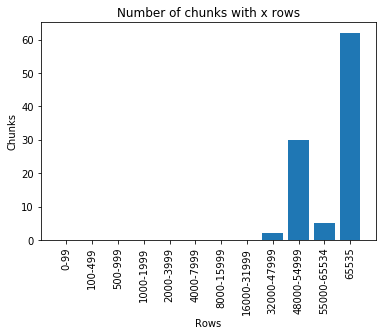

In [6]:
num_bins = np.arange(len(bins))

plt.bar(num_bins, chunks_per_bin)
plt.title("Number of chunks with x rows")
plt.xlabel("Rows")
plt.ylabel("Chunks")
plt.xticks(num_bins, labels_per_bin, rotation='vertical')

plt.show()

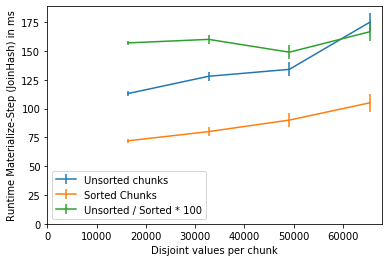

In [7]:
distinct_values = [65535/4*1, 65535/4*2, 65535/4*3, 65535/4*4]
yerr = np.arange(1, 5) * 2

runtimes = [113, 128, 134, 175]
plt.errorbar(distinct_values, runtimes, yerr=yerr, label='Unsorted chunks')

runtimes_sorted = [72, 80, 90, 105]
plt.errorbar(distinct_values, runtimes_sorted, yerr=yerr, label='Sorted Chunks')

runtimes_sorted_influence = np.array(runtimes) / np.array(runtimes_sorted) * 100
plt.errorbar(distinct_values, runtimes_sorted_influence, yerr=yerr, label='Unsorted / Sorted * 100')

#runtimes_mixed = [94, 113, 132, 151, 170]
#plt.errorbar([0]+distinct_values, runtimes_mixed, yerr=[1,2,3,4,5])

#speedups = np.array([175/113, 175/128, 175/134, 175/175]) * 100
#plt.errorbar(distinct_values, speedups, yerr=yerr)

#speedups_guess = np.array([175/95, 175/175]) * 100
#plt.errorbar([0, 65535], speedups_guess)

plt.xlim(xmin=0)
plt.xlabel("Disjoint values per chunk")
plt.ylim(ymin=0)
plt.ylabel("Runtime Materialize-Step (JoinHash) in ms")
plt.legend()
plt.show()

In [ ]:
def align_yaxis(ax1, v1, ax2, v2):
    """adjust ax2 ylimit so that v2 in ax2 is aligned to v1 in ax1"""
    _, y1 = ax1.transData.transform((0, v1))
    _, y2 = ax2.transData.transform((0, v2))
    adjust_yaxis(ax2,(y1-y2)/2,v2)
    adjust_yaxis(ax1,(y2-y1)/2,v1)

def adjust_yaxis(ax,ydif,v):
    """shift axis ax by ydiff, maintaining point v at the same location"""
    inv = ax.transData.inverted()
    _, dy = inv.transform((0, 0)) - inv.transform((0, ydif))
    miny, maxy = ax.get_ylim()
    miny, maxy = miny - v, maxy - v
    if -miny>maxy or (-miny==maxy and dy > 0):
        nminy = miny
        nmaxy = miny*(maxy+dy)/(miny+dy)
    else:
        nmaxy = maxy
        nminy = maxy*(miny+dy)/(maxy+dy)
    ax.set_ylim(nminy+v, nmaxy+v)

In [ ]:
queries = [3, 4, 5, 6, 7, 9, 12, 14, 15, 18, 20, 21]
queries = [str(x) for x in queries]
throughput = np.array([25, -21, -14, 318, 38, -16, 68, 88, 146, -24, 166, -15])
latency = [251, 132, 435, 35, 177, 948, 146, 80, 45, 998, 90, 725]

x = np.arange(len(queries))  # the label locations
width = 0.35  # the width of the bars

assert len(queries) == len(throughput), "Mismatch 1"
assert len(queries) == len(latency), "Mismatch 2"
print(f"Considering {len(queries)} queries")

fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('TPC-H Query')
ax1.set_xticks(x)
ax1.set_xticklabels(queries)
ax1.set_ylabel('Change in %', color='black')
throughput_bar = ax1.bar(x - width/2, throughput, width, label='Throughput', color=color)
ax1.tick_params(axis='y', labelcolor='black')
#ax1.legend()

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('Milliseconds', color='black')  # we already handled the x-label with ax1
latency_bar = ax2.bar(x + width/2, latency, width, label='Latency', color=color)
ax2.tick_params(axis='y', labelcolor='black')
#ax2.legend()

align_yaxis(ax1, 0, ax2, 0)

plt.legend([throughput_bar, latency_bar], ['Throughput', 'Latency'])
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.savefig('/home/aloeser/Downloads/throughput_latency.pdf')
plt.show()

32945.669379
33336.943587
347


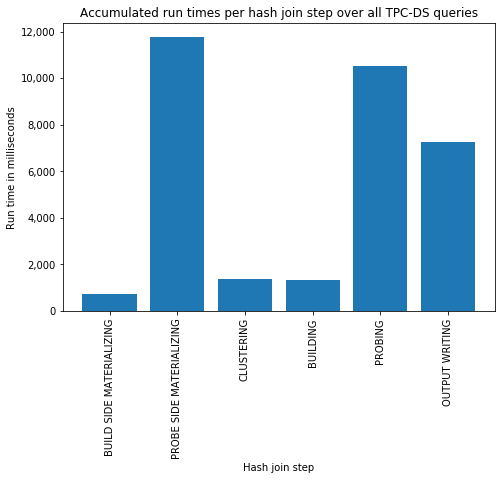

In [41]:
# Graph for the total runtime per hash join step
BENCHMARK = "TPC-DS"
if BENCHMARK == "TPC-H":
    JOIN_STATISTICS_PATH = f"~/Dokumente/repos/example_plugin/stats/final/tpch/sf10/01-l_orderkey-100/joins.csv"
elif BENCHMARK == "TPC-DS":
    JOIN_STATISTICS_PATH = f"~/Dokumente/repos/example_plugin/stats/final/tpcds/sf10-2d/nosort/joins.csv"
else:
    raise Exception("Unknown benchmark: " + BENCHMARK)

# TODO: when using more than one run: multiply operator runtimes with their query frequencies

ALL = 0
ONLY_CLUSTERING = 1
NO_CLUSTERING = 2
CLUSTERING_STATE = 0

joins = pd.read_csv(JOIN_STATISTICS_PATH, sep='|')
joins = joins.dropna()
if CLUSTERING_STATE == ONLY_CLUSTERING:
    joins = joins[joins['RADIX_BITS'] > 0]
elif CLUSTERING_STATE == NO_CLUSTERING:
    joins = joins[joins['RADIX_BITS'] == 0]

sum_columns = ['BUILD_SIDE_MATERIALIZING_NS', 'PROBE_SIDE_MATERIALIZING_NS', 'CLUSTERING_NS', 'BUILDING_NS', 'PROBING_NS', 'OUTPUT_WRITING_NS']
sums = []
sum_names = list(map(lambda x: x[:-3].replace('_', ' '), sum_columns))

for sum_column in sum_columns:
    sums.append(joins[sum_column].sum() / 1e6)


#fig, ax = plt.subplots()
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.bar(sum_names, sums)
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
ax.set_xlabel('Hash join step')
ax.set_ylabel('Run time in milliseconds')
ax.set_title(f'Accumulated run times per hash join step over all {BENCHMARK} queries')
plt.xticks(rotation=90)


filename = '/home/aloeser/Downloads/hash_join_steps_time'
if CLUSTERING_STATE == ALL:
    filename += "_all"
elif CLUSTERING_STATE == ONLY_CLUSTERING:
    filename += "_only_clustering"
elif CLUSTERING_STATE == NO_CLUSTERING:
    filename += "_no_clustering"
else:
    assert False
    
filename += f"_{BENCHMARK.lower().replace('-', '')}"
plt.savefig(f"{filename}.pdf", bbox_inches="tight")


print(sum(sums))
print(joins['RUNTIME_NS'].sum() / 1e6)
print(len(joins))

plt.show()



In [3]:
def extract_average_latencies(benchmark_folder):
    latencies = []
    for file in sorted(glob.glob(f"{benchmark_folder}/*.json")):
        with open(file, 'r') as f:
            benchmark_json = json.load(f)
        latencies.append(extract_average_latency(benchmark_json))
    
    return latencies

    
def extract_average_latency(benchmark_json, num_runs=20):
    benchmarks = benchmark_json['benchmarks']
    total_latency = 0
    
    for benchmark in benchmarks:
        assert len(benchmark['successful_runs']) == num_runs, f"Expected {num_runs} succesful runs per query"
        for run in benchmark['successful_runs']:
            total_latency += float(run['duration'])
            
    return total_latency / num_runs


In [4]:
def extract_cluster_counts(benchmark_folder, clustering_columns):
    all_counts = []
    for file in sorted(glob.glob(f"{benchmark_folder}/*.json")):
        with open(file, 'r') as f:
            benchmark_json = json.load(f)
        config = benchmark_json['clustering_info']['config']
        if "tpch" in benchmark_folder:
            config = config['lineitem']
        elif "tpcds" in benchmark_folder:
            config = config['store_sales']
        else:
            raise Exception("unknown benchmark")        
        
        counts = [1] * len(clustering_columns)
        for entry in config:
            # Skip sort column
            if entry[1] > 1:
                counts[clustering_columns.index(entry[0])] = entry[1]
        all_counts.append(counts)
    return pd.DataFrame(all_counts, columns=clustering_columns)
            
    

#extract_cluster_counts("/home/aloeser/Dokumente/repos/hyrise/benchmark_results/final/tpch/sf10-2d", ['l_receiptdate', 'l_shipdate', 'l_quantity', 'l_discount', 'l_partkey', 'l_suppkey', 'l_orderkey'])

[83172.7874437  87656.07742325 83155.5307453  83363.78107415
 80135.6631794  83211.79063195 83763.927432   82968.10671755
 83348.9921448  83822.50838215 90347.87899985 83299.28813635
 88603.2722183  84389.6610531  89292.8441973  87934.72560125
 88911.1342888  89534.5418514  89032.96589895 90669.56496175
 88279.30588205]


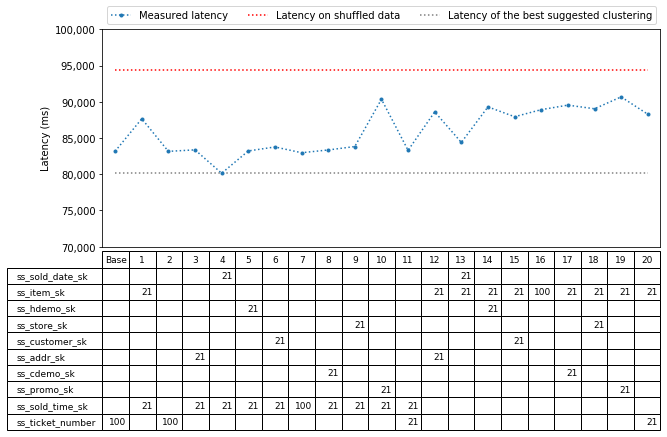

In [61]:
#latencies =      [112572, 134109, 119582, 122008, 123642, 111577, 114712, 119942, 115359, 120596, 121851, 123653, 116027, 120127, 115513, 134484, 139638, 132194, 134679, 131486, 136919]
BENCHMARK = "tpcds"

fig, ax = plt.subplots(figsize=(10,5))
if BENCHMARK == "tpch":
    #latencies_2d = [113365, 113365, 135667, 121118, 122106, 123642, 122489, 115618, 120957, 116044, 121015, 122708, 124168, 116078, 120665, 115980, 134894, 140735, 132876, 133818, 132028]
    #latencies_3d = [113248, 113248, 135123, 124036, 123894, 120651, 122415, 121044, 120724, 116775, 122392, 122956, 124901, 121764, 126297, 119824, 123250, 123614, 124119, 121595, 120524]
    latency_shuffled = 144684
    ax.set_ylim(ymin=100000,ymax=150000)
    benchmark_folder = "/home/aloeser/Dokumente/repos/hyrise/benchmark_results/final/tpch/sf10-2d"
    #benchmark_folder = "/home/aloeser/Dokumente/repos/hyrise/benchmark_results/final/tpch/sf10-3d"
    potential_clustering_columns = ['l_receiptdate', 'l_shipdate', 'l_quantity', 'l_discount', 'l_partkey', 'l_suppkey', 'l_orderkey']
    sort_column = "l_orderkey"
    default_chunks = 916
elif BENCHMARK == "tpcds":
    #latencies_2d = [83172, 87656, 83363, 80135, 82968, 83763, 83211, 83349, 83822, 90347, 83299, 83155, 88603, 84389, 88911, 87934, 89292, 89534, 89033, 90669, 88279]
    #latencies_3d = []
    latency_shuffled = 94393
    ax.set_ylim(ymin=70000,ymax=100000)
    benchmark_folder = "/home/aloeser/Dokumente/repos/hyrise/benchmark_results/final/tpcds/sf10-2d"
    #benchmark_folder = "/home/aloeser/Dokumente/repos/hyrise/benchmark_results/final/tpcds/sf10-3d-corrected"
    potential_clustering_columns = ['ss_sold_date_sk', 'ss_item_sk', 'ss_hdemo_sk', 'ss_store_sk', 'ss_customer_sk', 'ss_addr_sk', 'ss_cdemo_sk', 'ss_promo_sk', 'ss_sold_time_sk', 'ss_ticket_number']
    sort_column = "ss_ticket_number"
    default_chunks = 440
else:
    raise Exception("unknown benchmark")

MILLISECONDS = 1e6
latencies = np.array(extract_average_latencies(benchmark_folder)) / MILLISECONDS
print(latencies)

ranks = ['Base'] + [str(x + 1) for x in range(20)]


ax.plot(latencies, label='Measured latency', linestyle='dotted', marker='.')
#ax.plot(latencies_tpch_3d, label='3d')


plt.hlines(latency_shuffled, 0, 20, color='r', label='Latency on shuffled data', linestyle='dotted')
plt.hlines(min(latencies), 0, 20, color='gray', label='Latency of the best suggested clustering', linestyle='dotted')

ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))

ax.set_ylabel('Latency (ms)')
ax.set_xticks([])
#ax.set_xticklabels(ranks)
#ax.set_xlabel("Suggestion rank")

PAPER_MODE = True
if PAPER_MODE:
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width, box.height * 0.8])
    legend = ax.legend(loc="lower center", ncol=3, bbox_to_anchor=(0.5, 1))
else:
    legend = ax.legend(loc='center left', ncol=1, bbox_to_anchor=(1.0, 0.5))

the_table = add_cluster_count_table(benchmark_folder, potential_clustering_columns, ax)

plt.margins(1/42, 1/42) # no empty space on left and right within bar chart
plt.savefig(f'/home/aloeser/Downloads/top20_latency_{BENCHMARK}.pdf', bbox_extra_artists=(legend,the_table,), bbox_inches="tight")

In [13]:
def extract_operator_durations_from_pqp(pqp_folder):
    all_operator_breakdowns = {}
    for file in sorted(glob.glob(f"{pqp_folder}/*-PQP.svg")):
        operator_breakdown = {}
        with open(file, "r") as svg:
            svg_string = svg.read().replace("\n", "|")

            # Find the "total by operator" table using a non-greedy search until the end of the <g> object
            table_string = re.findall(r"Total by operator(.*?)</g>", svg_string)[0]

            # Replace all objects within the table string, also trim newlines (rewritten to |) at the begin and the end
            table_string = re.sub(r"<.*?>", "", table_string)
            table_string = re.sub(r"^\|*", "", table_string)
            table_string = re.sub(r"\|*$", "", table_string)

            row_strings = table_string.split("||")

            # The svg table stores data in a columnar orientation, so we first extract the operator names, then their
            # durations
            operator_names = []
            operator_durations = []

            for operator_name in row_strings[0].split("|"):
                operator_names.append(operator_name.strip())

            # Convert time string to nanoseconds and add to operator_durations
            for operator_duration_str in row_strings[1].split("|"):
                operator_duration = pd.Timedelta(operator_duration_str.replace("µ", "u")).total_seconds() * 1e9
                operator_durations.append(operator_duration)

            operator_breakdown = dict(zip(operator_names, operator_durations))

            # Ignore the "total" line
            del operator_breakdown["total"]

        # Store in all_operator_breakdowns
        all_operator_breakdowns[file.replace("-PQP.svg", "").replace("TPC-H_", "Q")] = operator_breakdown

    # Make operators the columns and order by operator name
    df = pd.DataFrame(all_operator_breakdowns).transpose()
    df = df.reindex(sorted(df.columns, reverse=True), axis=1)

    df = df.fillna(0)

    # Calculate share of total execution time (i.e., longer running benchmark items are weighted more)
    #df.loc["Absolute"] = df.sum() / df.count()

    # Normalize data from nanoseconds to milliseconds
    df.iloc[:, 0:] = df.iloc[:, 0:].apply(lambda x: x / 1000000, axis=1)
    
    return df

In [16]:
def extract_operator_durations_from_csv(csv_folder):
    scan_df = pd.read_csv(csv_folder + "/table_scans.csv", sep='|')
    if "tpch" in csv_folder:
        scan_df = scan_df[scan_df['TABLE_NAME'] == "lineitem"]
    elif "tpcds" in csv_folder:
        scan_df = scan_df[scan_df['TABLE_NAME'] == "store_sales"]
    scan = scan_df['RUNTIME_NS'].sum()
    
    
    aggregate_columns = "OPERATOR_TYPE|QUERY_HASH|OPERATOR_HASH|LEFT_INPUT_OPERATOR_HASH|RIGHT_INPUT_OPERATOR_HASH|COLUMN_TYPE|TABLE_NAME|COLUMN_NAME|GROUP_BY_COLUMN_COUNT|AGGREGATE_COLUMN_COUNT|INPUT_CHUNK_COUNT|INPUT_ROW_COUNT|OUTPUT_CHUNK_COUNT|OUTPUT_ROW_COUNT|GROUP_BY_KEY_PARTITIONING_NS|AGGREGATING_NS|GROUP_BY_COLUMNS_WRITING_NS|AGGREGATE_COLUMNS_WRITING_NS|OUTPUT_WRITING_NS|RUNTIME_NS|DESCRIPTION".split("|")
    aggregate_df = pd.read_csv(csv_folder + "/aggregates.csv", sep='|', names=aggregate_columns)
    aggregate_operators = aggregate_df.groupby(['QUERY_HASH', 'OPERATOR_HASH'])['RUNTIME_NS'].mean()
    aggregate = aggregate_operators.sum()
    
    join_df = pd.read_csv(csv_folder + "/joins.csv", sep='|')
    join_estimated = (join_df['BUILD_SIDE_MATERIALIZING_NS'] + join_df['PROBE_SIDE_MATERIALIZING_NS'] + join_df['PROBING_NS']).sum()
    join_unestimated = join_df['RUNTIME_NS'].sum() - join_estimated
    
    return scan, join_estimated, join_unestimated, aggregate

In [17]:
def extract_operator_durations_range(folder):
    aggregates = []
    joins_estimated = []
    joins_unestimated = []
    scans = []
    for csv_folder in sorted(glob.glob(f"{folder}/*")):
        #print(f"processing {csv_folder}")
        runtimes = extract_operator_durations_from_csv(csv_folder)
        aggregates.append(int(runtimes[3]))
        joins_estimated.append(int(runtimes[1]))
        joins_unestimated.append(int(runtimes[2]))
        scans.append(int(runtimes[0]))
    
    return np.array(aggregates), np.array(joins_estimated), np.array(joins_unestimated), np.array(scans)

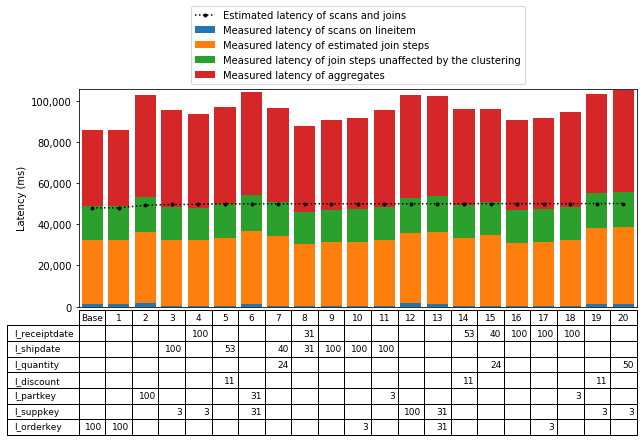

In [59]:
BENCHMARK = "tpch"
if BENCHMARK == "tpch":
    #guesses = [47420, 47420, 47998, 48936, 48952, 48960, 48963, 48965, 48965, 48965, 49008, 49020, 49028, 49037, 49037, 49037, 49371, 49376, 49400, 49400, 49400]
    guesses = [47947, 47947, 49211, 49569, 49640, 49897, 49901, 49905, 49909, 49911, 49911, 49911, 49934, 49945, 49964, 49973, 49982, 49982, 49982, 50011, 50041]
    stats_path = '/home/aloeser/Dokumente/repos/example_plugin/stats/final/tpch/sf10-2d'
    benchmark_folder = '/home/aloeser/Dokumente/repos/hyrise/benchmark_results/final/tpch/sf10-2d'
    potential_clustering_columns = ['l_receiptdate', 'l_shipdate', 'l_quantity', 'l_discount', 'l_partkey', 'l_suppkey', 'l_orderkey']
    table_name = "lineitem"
elif BENCHMARK == "tpcds":    
    guesses = [33728, 33628, 33728, 33743, 33743, 33772, 33772, 33778, 33787, 33787, 33787, 33787, 33939, 33939, 33968, 33968, 33978, 33983, 33983, 33983, 33983]    
    stats_path = '/home/aloeser/Dokumente/repos/example_plugin/stats/final/tpcds/sf10-2d-correction'
    benchmark_folder = '/home/aloeser/Dokumente/repos/hyrise/benchmark_results/final/tpcds/sf10-2d'
    potential_clustering_columns = ['ss_sold_date_sk', 'ss_item_sk', 'ss_hdemo_sk', 'ss_store_sk', 'ss_customer_sk', 'ss_addr_sk', 'ss_cdemo_sk', 'ss_promo_sk', 'ss_sold_time_sk', 'ss_ticket_number']
    table_name = "store_sales"
else:
    raise Exception("unknown benchmark")

    
aggregates, joins_estimated, joins_unestimated, scans = extract_operator_durations_range(stats_path)
MS_FACTOR = 1e6
aggregates = aggregates / MS_FACTOR
joins_estimated = joins_estimated / MS_FACTOR
joins_unestimated = joins_unestimated / MS_FACTOR
scans = scans / MS_FACTOR        
    
#scans[0] = scans[1]
#joins_estimated[0] = joins_estimated[1]
#joins_unestimated[0] = joins_unestimated[1]
#aggregates[0] = aggregates[1]


fig, ax = plt.subplots(figsize=(10,5))
ax.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
x = np.arange(len(scans))
xlabels = ['Base'] + [str(x) for x in range(1,21)]
scanbar = ax.bar(x, scans, label=f'Measured latency of scans on {table_name}')
join_estimated_bar = ax.bar(x, joins_estimated, bottom=scans, label='Measured latency of estimated join steps')
join_unestimated_bar = ax.bar(x, joins_unestimated, bottom=joins_estimated+scans, label='Measured latency of join steps unaffected by the clustering')
aggregatebar = ax.bar(x, aggregates, bottom=joins_unestimated+joins_estimated+scans, label='Measured latency of aggregates')
ax.plot(guesses, color="black", linestyle='dotted',marker='.', label='Estimated latency of scans and joins')
#ax.set_xticks(x)
ax.set_xticks([])
#ax.set_xticklabels(xlabels)
#ax.set_xlabel('Suggestion rank')
ax.set_ylabel('Latency (ms)')


PAPER_MODE = True
if PAPER_MODE:
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width, box.height * 0.8])
    legend = ax.legend(loc="lower center", ncol=1, bbox_to_anchor=(0.5, 1))
else:
    legend = ax.legend(loc='center left', ncol=1, bbox_to_anchor=(1.0, 0.5))


the_table = add_cluster_count_table(benchmark_folder, potential_clustering_columns, ax)

plt.margins(0.005, 0.005) # no empty space on left and right within bar chart
plt.savefig(f'/home/aloeser/Downloads/detailed_estimates_{BENCHMARK}.pdf', bbox_extra_artists=(legend,the_table), bbox_inches="tight")
plt.show()

In [57]:
def add_cluster_count_table(benchmark_folder, potential_clustering_columns, ax):
    def format_cluster_count(row):
        num_clusters = row['num_clusters']
        if 1.8 *  num_clusters < default_chunks:
            new_cluster_count = np.int64(row[sort_column] * round(default_chunks / row['num_clusters']))
            return str(new_cluster_count)
            #return f"{row[sort_column]} ({new_cluster_count})"
        else:
            return str(row[sort_column])

    table_df = extract_cluster_counts(benchmark_folder, potential_clustering_columns)
    table_df['num_clusters'] = table_df.product(axis=1)
    #table_df[sort_column] = table_df.apply(format_cluster_count, axis=1)
    table_df.drop('num_clusters', inplace=True, axis=1)
    table_df = table_df.transpose()

    the_table = ax.table(cellText=table_df.values,
                          colLabels=ranks,
                          rowLabels=potential_clustering_columns,
                          loc='center', bbox=[0, -0.0842 * len(potential_clustering_columns), 1, len(potential_clustering_columns) * 0.0821]) #



    for index, column in enumerate(potential_clustering_columns):
        for rank in range(21):        
            if pd.isna(table_df.loc[column, rank]) or table_df.loc[column, rank] == 1:
                the_table[ (index+1, rank)].set_text_props(text="")
            #else:
            #    the_table[ (index+1, rank)].get_text().set_weight('bold')
    return the_table

In [55]:
estimates = scans + joins_estimated + joins_unestimated

print(stats.gmean(guesses/estimates))
print(min(estimates), max(estimates))
print(aggregates)

0.9188502981051219
48753.71657699999 60449.252427
[37214.485801 37214.485801 49460.265298 46911.246311 46804.415724
 45534.143942 42095.956827 43503.273345 46961.800039 43917.928125
 45435.409247 46494.319481 45333.965722 43967.565136 45917.33627
 44077.80756  47812.057651 50328.932973 46724.041205 47099.058571
 46833.595519]


In [ ]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import matplotlib.colors as mplcolors# load data from Excel-exported CSV (data.xlsx) .. actually exported with Numbers.app
results = pd.read_csv('excel_exported_results_with_umbra.csv', sep=';', usecols=range(6))#prepare table data (nice up the runtimes as strings, collected shortest runtimes)
str_results = []
min_results = []
for q_id, query_results in enumerate(results.iloc[:,1:].values):
    str_query_results = []
    min_runtime = min(query_results)
    for db_id, query_result in enumerate(query_results):
        if query_result == min_runtime:
            min_results.append([q_id, db_id])
        str_query_results.append(f'{query_result:,}')
    str_results.append(str_query_results)
table_df = pd.DataFrame(str_results).transpose()# https://chrisalbon.com/python/data_visualization/matplotlib_grouped_bar_plot/
fig, ax = plt.subplots(figsize=(15,3))
pos = list(range(len(results['Hyrise']))) 
width = 0.14
gap = 0.03# color map of ColorBrewer
color_map = plt.get_cmap('Paired')
new_colors = list(color_map.colors)
new_colors[0] = color_map.colors[5]  # reds for Munich
new_colors[1] = color_map.colors[4]
new_colors[2] = color_map.colors[3]  # greens for Amsterdam
new_colors[3] = color_map.colors[2]
new_colors[4] = color_map.colors[1]  # blue for Hyrise
color_map.colors = tuple(new_colors)
color_jump_width = 1 / len(color_map.colors)
plt.bar(pos, results['Hyper'], width, label='Hyper', color=color_map(0))
plt.bar([p + gap + width for p in pos], results['Umbra'], width, label='Umbra', color=color_map(color_jump_width))
plt.bar([p + (gap+width)*2 for p in pos], results['MonetDB'], width, label='MonetDB', color=color_map(color_jump_width*2))
plt.bar([p + (gap+width)*3 for p in pos], results['DuckDB'], width, label='DuckDB', color=color_map(color_jump_width*3))
plt.bar([p + (gap+width)*4 for p in pos], results['Hyrise'], width, label='Hyrise', color=color_map(color_jump_width*4))# Add hatches
patterns = ('///', '/////', '\\\\\\', '\\\\\\\\\\', '')
hatches = [p for p in patterns for i in range(len(pos))]
for bar, hatch in zip(ax.patches, hatches):
    # Calculate color so that the hatches are visible but not pushy
    hsv = mplcolors.rgb_to_hsv(bar.get_facecolor()[:3])
    hatch_color_hsv = hsv
    hatch_color_hsv[2] = hsv[2] + .2 if hsv[2] < .5 else hsv[2] - .2
    bar.set_edgecolor(mplcolors.hsv_to_rgb(hatch_color_hsv))
    bar.set_hatch(hatch)
    bar.set_linewidth(0)# Add a table at the bottom of the axes
# https://matplotlib.org/3.1.0/gallery/misc/table_demo.html#sphx-glr-gallery-misc-table-demo-py
the_table = plt.table(cellText=table_df.values,
                      colLabels=['Q'+str(q) for q in results['Query']],
                      rowLabels=list(results.columns.values)[1:],
                      loc='bottom', bbox=[0, -0.6, 1, 0.575])
for q_id, db_id in min_results:
    the_table[(db_id + 1, q_id)].get_text().set_weight('bold')
ax.set_xticks([])
ax.set_ylabel('Runtime [ms]')
ax.set_yscale('log')
ax.set_ylim(top=max(results.values.flatten())*1.2)
ax.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))
ax.legend(ncol=3, loc='upper left', bbox_to_anchor=(0.06, 1.0))
plt.margins(0.005, 0.005) # no empty space on left and right within bar chart
plt.savefig('graph2_with_umbra.pdf', bbox_inches='tight')